<a href="https://colab.research.google.com/github/jovian-explorer/BBbarolo/blob/main/Rotation_curve_fitting_using_HI_spectral_cube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is not a part of the actual assignment, but since I was playing around with the fits file, I thought of sharing it as well.

####Importing Libraries

In [33]:
#importing necessary packages
import numpy as np
from astropy.io import fits as f
from astropy.table import Table as t
import matplotlib.colors as mpl
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from mpl_toolkits import mplot3d

####Importing data

I have used my github profile to upload data, instead of going through the hassle of mounting the drive, or uploading the files each time.

https://github.com/jovian-explorer

In [34]:
#downloading and opening the data file
fname= download_file('https://github.com/jovian-explorer/BBbarolo/blob/main/ngc2403.fits?raw=true',cache=True)
aa = f.open(fname,memap=True)

In [35]:
#displaying the info in the file
aa.info()

Filename: /root/.astropy/cache/download/url/ebbedf398caa205bbe2f5573b7201ca5/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1132   (150, 150, 62)   float32   


In [36]:
dataset = aa['PRIMARY'].data

####Printing out the data

In [37]:
print(dataset)

[[[ 6.20682549e-05  7.64357974e-05  6.98616932e-05 ...  6.59313402e-04
    5.26737771e-04  3.20941181e-04]
  [ 1.12828304e-04  1.34738657e-04  1.08759348e-04 ...  6.50624570e-04
    4.88503487e-04  2.65509589e-04]
  [ 1.54832946e-04  2.00119335e-04  1.98642578e-04 ...  4.85910394e-04
    3.15441081e-04  1.31576773e-04]
  ...
  [ 4.85030105e-05  4.56393536e-05  1.22609345e-04 ... -2.16668959e-05
    1.71335691e-04  2.05038334e-04]
  [ 4.10546381e-05  6.73574250e-05  1.59419142e-04 ... -7.48550519e-05
    1.41464872e-04  2.05126358e-04]
  [ 4.85894088e-05  7.89931946e-05  1.42287725e-04 ... -1.09432978e-04
    6.99016091e-05  1.33764770e-04]]

 [[-5.27691373e-05 -3.65781852e-05 -5.90782565e-06 ...  2.91832781e-04
    1.19444478e-04 -1.04376359e-05]
  [-6.56971042e-06 -3.62447354e-05 -7.41894401e-05 ...  2.37465356e-04
    3.27783673e-05 -7.90791819e-05]
  [ 1.31663110e-05 -7.46967416e-05 -1.61806442e-04 ...  1.04797793e-04
   -1.07021508e-04 -1.62622047e-04]
  ...
  [-2.07684090e-04 -2.0

In [38]:
print(dataset.ndim)  #dimensions of the data

3


In [39]:
print(dataset.shape)

(62, 150, 150)


In [40]:
print(dataset[0])

[[ 6.20682549e-05  7.64357974e-05  6.98616932e-05 ...  6.59313402e-04
   5.26737771e-04  3.20941181e-04]
 [ 1.12828304e-04  1.34738657e-04  1.08759348e-04 ...  6.50624570e-04
   4.88503487e-04  2.65509589e-04]
 [ 1.54832946e-04  2.00119335e-04  1.98642578e-04 ...  4.85910394e-04
   3.15441081e-04  1.31576773e-04]
 ...
 [ 4.85030105e-05  4.56393536e-05  1.22609345e-04 ... -2.16668959e-05
   1.71335691e-04  2.05038334e-04]
 [ 4.10546381e-05  6.73574250e-05  1.59419142e-04 ... -7.48550519e-05
   1.41464872e-04  2.05126358e-04]
 [ 4.85894088e-05  7.89931946e-05  1.42287725e-04 ... -1.09432978e-04
   6.99016091e-05  1.33764770e-04]]


In [41]:
print(dataset[0,0])

[ 6.2068255e-05  7.6435797e-05  6.9861693e-05 -4.1853178e-05
 -2.6319234e-04 -4.3615571e-04 -4.7370297e-04 -4.5303913e-04
 -3.9447017e-04 -2.4562259e-04 -6.4174310e-05  1.0409368e-05
 -5.5612581e-05 -1.0530456e-04  1.5744810e-05  2.2137715e-04
  3.2795247e-04  3.0074548e-04  1.8617259e-04  3.1852738e-05
 -5.7366284e-05 -4.7170448e-05 -8.0812482e-05 -2.4730520e-04
 -4.1329302e-04 -4.0498143e-04 -2.5122802e-04 -1.6815313e-04
 -2.5488698e-04 -3.2054400e-04 -1.6019546e-04  1.3488268e-04
  2.9629393e-04  1.8298850e-04 -1.0625557e-04 -3.0992378e-04
 -2.5437545e-04 -3.8460046e-05  1.4139466e-04  1.8526634e-04
  8.1872306e-05 -8.1484686e-05 -1.3690363e-04  6.2655545e-06
  2.3249697e-04  3.4380975e-04  3.0882037e-04  2.5535020e-04
  2.4030660e-04  1.8849276e-04  5.7294044e-05 -9.5258285e-05
 -2.3646864e-04 -3.5231368e-04 -3.3191568e-04 -1.2863694e-04
  1.0176374e-04  2.1050721e-04  2.0646911e-04  1.5954107e-04
  8.6878099e-05 -5.1954252e-05 -2.3342883e-04 -3.2002726e-04
 -2.2095317e-04  9.97226

#### Trying some plotting

#####2D plots

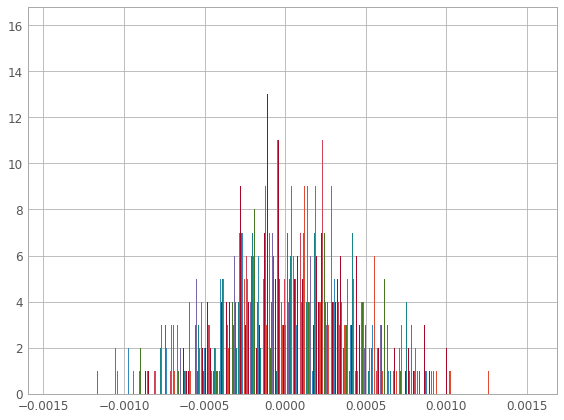

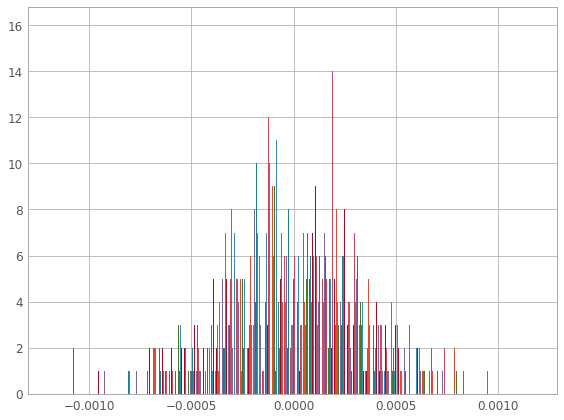

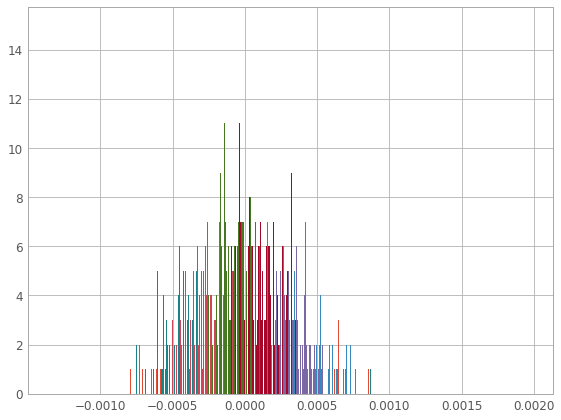

In [42]:
#plotting a histogram of the values
e=plt.hist(dataset[0],bins='auto')
plt.show()
q=plt.hist(dataset[1],bins='auto')
plt.show()
g=plt.hist(dataset[2],bins='auto')
plt.show()

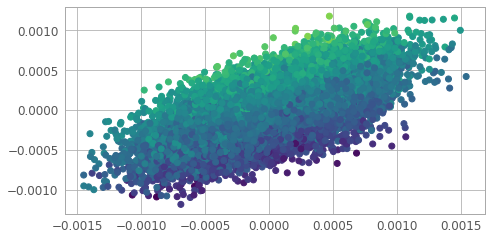

In [56]:
plt.scatter(dataset[0],dataset[1],c=dataset[2],cmap='viridis')

#####3D plots

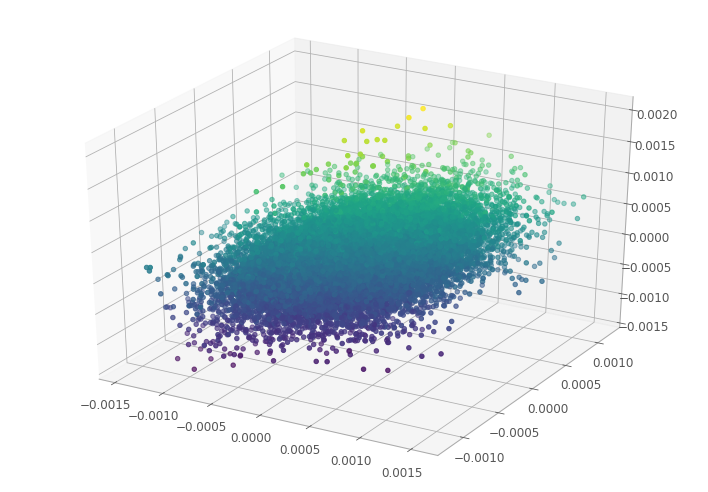

In [57]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(dataset[0],dataset[1],dataset[2],c=dataset[2],cmap='viridis')
# show plot
plt.show()

####Finally, some simple calulations

In [61]:
#Printing the minimum, maximum and mean values of the pixels
print("Min: "+str(np.min(dataset)))
print("Max: "+str(np.max(dataset)))
print("Mean: "+str(np.mean(dataset)))
#Displaying the location of the central (also the brightest) pixel
m=np.max(dataset)
print("Position of the brightest central pixel is: ",np.where(dataset==m))

Min: -0.0056104497
Max: 0.25994283
Mean: 0.0024052707
Position of the brightest central pixel is:  (array([14]), array([68]), array([68]))
